In [111]:
#Exportacion de las librerias
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#librerias para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
#lectura de datos en python y lo cargamos en la variable datos
datos = pd.read_csv('C:/Users/usuario/ANALISIS DE DATOS/heart_cleveland_upload.csv')

#realizamos la lectura de los datos para el analisis exploratorio
datos.head(300)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [29]:
#Descripcion de los datos
datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y atipicos')

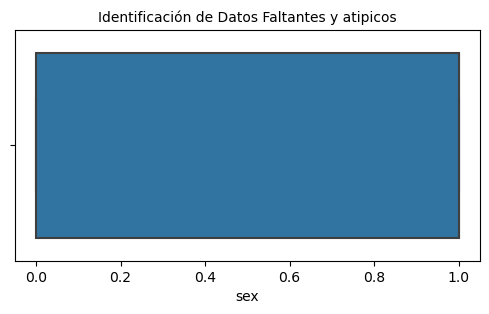

In [39]:
#idetificacion de datos faltantes y atipicos

plt.figure(figsize=(6,3)) #tamaño de figura
sns.boxplot(x=datos['sex'])
plt.title('Identificación de Datos Faltantes y atipicos', fontsize=10) # titulo de la grafica


Text(0.5, 1.0, 'Identificación de Datos Faltantes y atipicos')

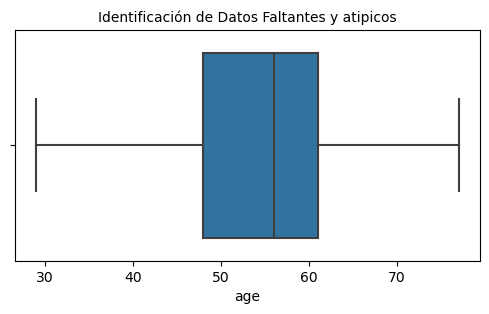

In [40]:
#idetificacion de datos faltantes y atipicos

plt.figure(figsize=(6,3)) #tamaño de figura
sns.boxplot(x=datos['age'])
plt.title('Identificación de Datos Faltantes y atipicos', fontsize=10) # titulo de la grafica


Text(0.5, 1.0, 'Identificación de Datos Faltantes y atipicos')

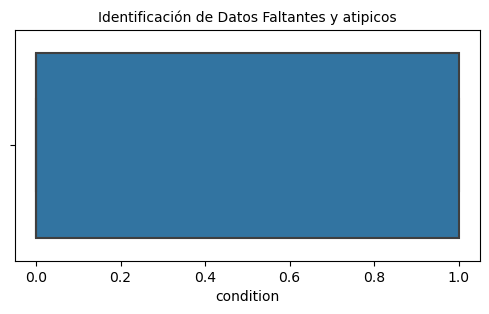

In [38]:
#idetificacion de datos faltantes y atipicos

plt.figure(figsize=(6,3)) #tamaño de figura
sns.boxplot(x=datos['condition'])
plt.title('Identificación de Datos Faltantes y atipicos', fontsize=10) # titulo de lka grafica


Text(0.5, 1.0, 'Identificación de Datos Faltantes y atipicos')

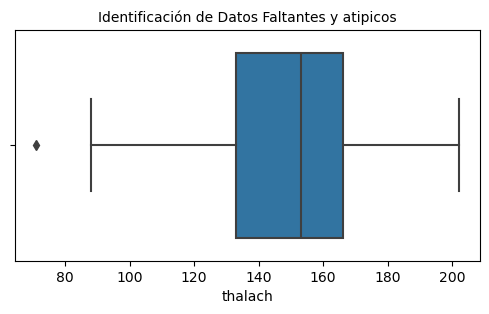

In [63]:
#idetificacion de datos faltantes y atipicos

plt.figure(figsize=(6,3)) #tamaño de figura
sns.boxplot(x=datos['thalach'])
plt.title('Identificación de Datos Faltantes y atipicos', fontsize=10) # titulo de lka grafica


In [53]:
# Revision de datos faltantes
print("Cantidas de registros con cero en age (Edad)", datos['age'].isin([0]).sum())
print("Cantidas de registros con cero en chol (Nivel de colesterol en mg/dl)", datos['chol'].isin([0]).sum())
print("Cantidas de registros con cero en thal (Tipo de defecto cardíaco)", datos['thal'].isin([0]).sum())



Cantidas de registros con cero en age (Edad) 0
Cantidas de registros con cero en cp (Tipo de dolor en el pecho) 23
Cantidas de registros con cero en chol (Nivel de colesterol en mg/dl) 0
Cantidas de registros con cero en thal (Tipo de defecto cardíaco) 164


In [55]:
# Reemplazar todos los ceros en el valor promedio de la columna.
# Se identifica que la mayoria de las colmunas estas codificadas en diferentes categoria por lo que no seria comveniente hacer reemplazo de datos
# Ejemplo para la columna exang (Angina inducida por ejercicio ) generalmente codificada como 0 para no y 1 para sí



Text(0.5, 1.0, 'Identificación de Datos Atipicos')

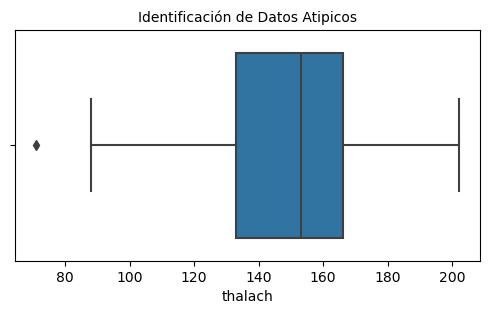

In [68]:
#Identificación de datos Atipicos


plt.figure(figsize=(6,3)) #tamaño de figura
sns.boxplot(x=datos['thalach'])
plt.title('Identificación de Datos Atipicos', fontsize=10) # titulo de la grafica

In [74]:
#conteo de datos atipicos
minimo=80
maximo=180
atipicos=((datos['thalach']<minimo)|(datos['thalach']>maximo)).sum()
print("El total de datos atípicos es {}".format(atipicos))

El total de datos atípicos es 19


In [75]:
# filtrar datos atipicos
datos=datos[(datos['thalach']<maximo)&(datos['thalach']>minimo)]

In [77]:
#validar si se removieron los datos atipicos
atipicos=((datos['thalach']<minimo)|(datos['thalach']>maximo)).sum()
print("El total de datos atípicos es {}".format(atipicos))

El total de datos atípicos es 0


In [79]:
#Revisión del tipo de datos y datos faltantes
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        276 non-null    int64  
 1   sex        276 non-null    int64  
 2   cp         276 non-null    int64  
 3   trestbps   276 non-null    int64  
 4   chol       276 non-null    int64  
 5   fbs        276 non-null    int64  
 6   restecg    276 non-null    int64  
 7   thalach    276 non-null    int64  
 8   exang      276 non-null    int64  
 9   oldpeak    276 non-null    float64
 10  slope      276 non-null    int64  
 11  ca         276 non-null    int64  
 12  thal       276 non-null    int64  
 13  condition  276 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.3 KB


In [83]:
# Total de personas con Enfermedad cardiaca
# para ausencia 0 y 1 para presencia
datos['condition'].value_counts()

condition
0    143
1    133
Name: count, dtype: int64

In [86]:
datos[['condition']].head(20)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [96]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# se crean variables X y Y para almacenar la información del entrenamiento

X = datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition 
Y = datos['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

#impresion de resultados X_train
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
233   57    1   3       132   207    0        0      168      1      0.0   
135   46    0   2       142   177    0        2      160      1      1.4   
122   51    0   2       130   256    0        2      149      0      0.5   
249   54    1   3       140   239    0        0      160      0      1.2   
174   64    1   3       120   246    0        2       96      1      2.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
148   41    1   2       112   250    0        0      179      0      0.0   
119   51    1   2       125   245    1        2      166      0      2.4   
24    71    0   1       160   302    0        0      162      0      0.4   
5     64    1   0       170   227    0        2      155      0      0.6   

     slope  ca  thal  
233      0   0     2  
135      2   0     0  
122      0   0    

In [103]:
#impresion de resultados Y_train
print (Y_train)

233    0
135    0
122    0
249    0
174    1
      ..
291    1
148    0
119    0
24     0
5      0
Name: condition, Length: 207, dtype: int64


In [106]:
# Construir el modelo de regresión logística 
regresion = LogisticRegression(solver = "liblinear") 
regresion.fit (X_train , Y_train)   
print(regresion)
# Crea el modelo de prediccion
Prediccion = regresion.predict(X_test)

LogisticRegression(solver='liblinear')


In [100]:
#impresion de resultados
print (Y_test)

252    1
87     1
104    0
11     1
210    1
      ..
117    0
118    0
36     0
251    0
22     0
Name: condition, Length: 69, dtype: int64


In [101]:
#impresion de resultados prediccion
print (Prediccion)

[1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0]


In [108]:
#Desempeño del modelo de regresion
print(classification_report(Y_test,Prediccion))


              precision    recall  f1-score   support

           0       0.79      0.92      0.85        36
           1       0.89      0.73      0.80        33

    accuracy                           0.83        69
   macro avg       0.84      0.82      0.82        69
weighted avg       0.84      0.83      0.82        69



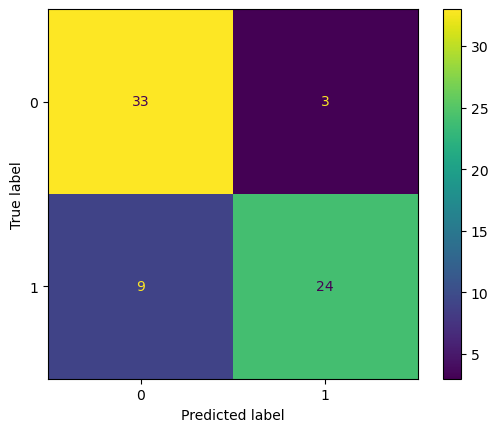

In [109]:
#Matriz de confusion del modelo
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


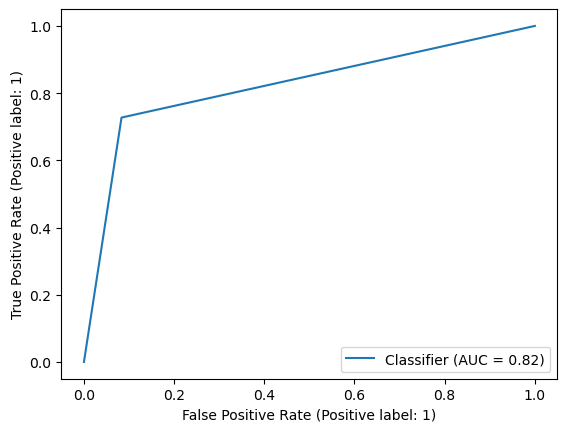

In [113]:
# Curva de precisón del modelo
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()
